<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CAND_ID                 1897 non-null   object 
 1   CAND_NAME               1897 non-null   object 
 2   CAND_ICI                1893 non-null   object 
 3   PTY_CD                  1897 non-null   int64  
 4   CAND_PTY_AFFILIATION    1896 non-null   object 
 5   TTL_RECEIPTS            1897 non-null   float64
 6   TRANS_FROM_AUTH         1897 non-null   float64
 7   TTL_DISB                1897 non-null   float64
 8   TRANS_TO_AUTH           1897 non-null   float64
 9   COH_BOP                 1897 non-null   float64
 10  COH_COP                 1897 non-null   float64
 11  CAND_CONTRIB            1897 non-null   float64
 12  CAND_LOANS              1897 non-null   float64
 13  OTHER_LOANS             1897 non-null   float64
 14  CAND_LOAN_REPAY         1897 non-null   

None

Index(['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'PTY_CD', 'CAND_PTY_AFFILIATION',
       'TTL_RECEIPTS', 'TRANS_FROM_AUTH', 'TTL_DISB', 'TRANS_TO_AUTH',
       'COH_BOP', 'COH_COP', 'CAND_CONTRIB', 'CAND_LOANS', 'OTHER_LOANS',
       'CAND_LOAN_REPAY', 'OTHER_LOAN_REPAY', 'DEBTS_OWED_BY',
       'TTL_INDIV_CONTRIB', 'CAND_OFFICE_ST', 'CAND_OFFICE_DISTRICT',
       'SPEC_ELECTION', 'PRIM_ELECTION', 'RUN_ELECTION', 'GEN_ELECTION',
       'GEN_ELECTION_PRECENT', 'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB',
       'CVG_END_DT', 'INDIV_REFUNDS', 'CMTE_REFUNDS'],
      dtype='object')

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H6AK00045,"YOUNG, DONALD E",I,2,REP,1103561.86,0.0,1322055.12,0.0,488220.12,...,NaN,NaN,NaN,NaN,NaN,459603.99,0.0,12/31/2016,2250.00,3000.0
1,H6AK00235,"LINDBECK, STEVE",NaN,1,DEM,1102309.77,0.0,1098098.09,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,67074.61,5000.0,12/31/2016,884.01,0.0
2,H4AL01123,"BYRNE, BRADLEY ROBERTS",I,2,REP,1367469.77,33152.0,1172750.28,0.0,251598.84,...,NaN,NaN,NaN,NaN,NaN,843200.00,0.0,12/31/2016,1100.00,0.0
3,H6AL01060,"YOUNG JR, LARRY DEAN",C,2,REP,178766.88,0.0,178474.16,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,04/14/2016,0.00,0.0
4,H6AL02167,"MATHIS, NATHAN",C,1,DEM,36844.00,0.0,36844.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,11/16/2016,0.00,0.0


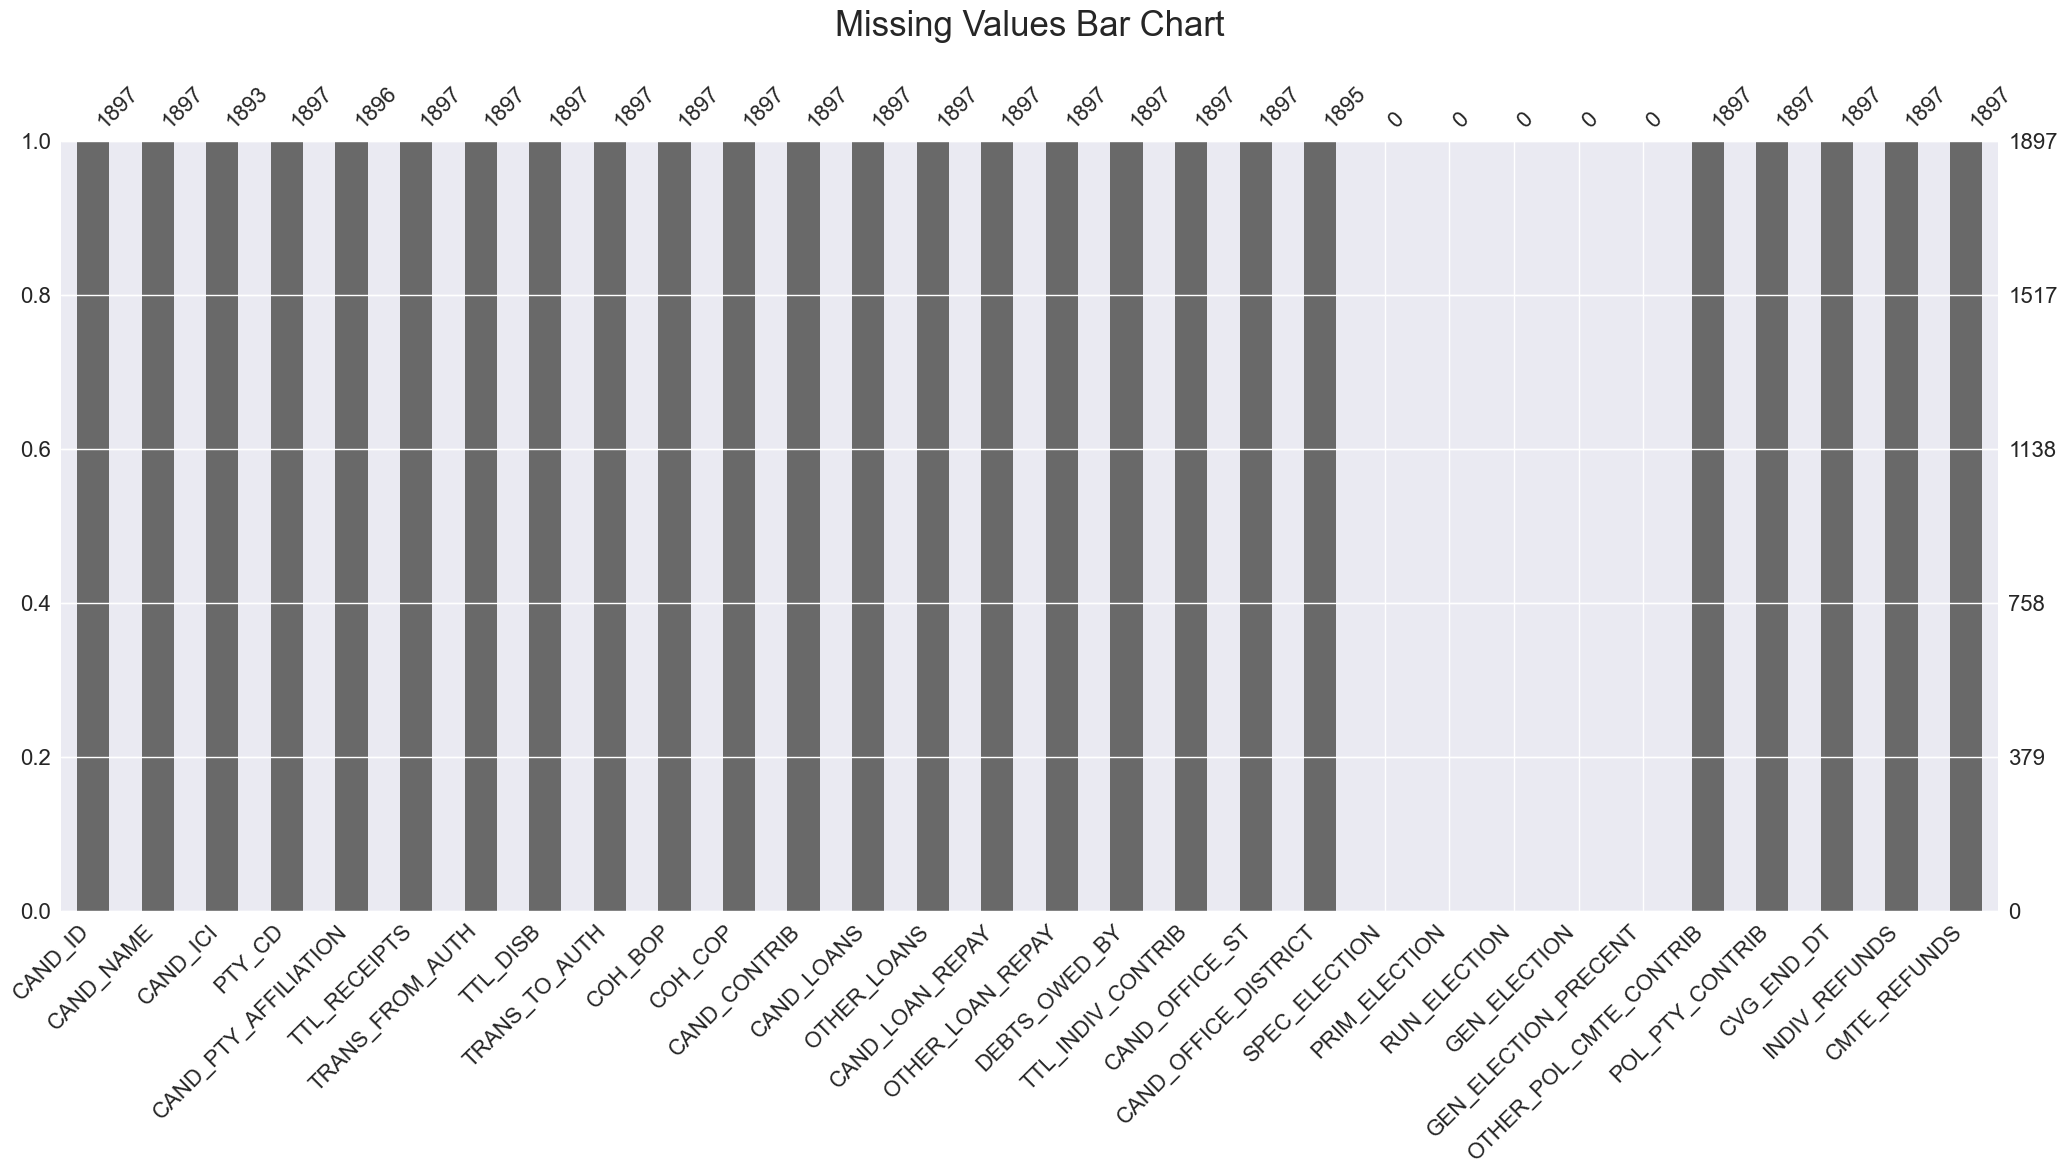

In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-v0_8')
from name_cleaner import clean_names
import warnings
warnings.simplefilter(action='ignore', category='Warning')

names  = pd.read_csv('../data/raw/campaign_finance_header.csv')

df = pd.read_csv('../data/raw/house_campaign_finance_data_2016_fec_raw.csv', names=list(names))

display(df.info(), df.columns, df.head())

msno.bar(df)        
plt.title('Missing Values Bar Chart\n', fontsize=25)

df.drop(['SPEC_ELECTION', 'PRIM_ELECTION','RUN_ELECTION', 'GEN_ELECTION', 'GEN_ELECTION_PRECENT'], axis='columns', inplace=True)

column_mapping = {'CAND_ID':'fec_id', 'CAND_OFFICE_ST':'state_abbr', 'CAND_NAME':'name', 'CAND_ICI':'inc', 'CAND_PTY_AFFILIATION':'party', 'TTL_RECEIPTS':'tot_rec'}

df.rename(column_mapping, axis='columns', inplace=True)

In [4]:
finance = df[list(column_mapping.values())]

finance = finance[finance['fec_id'].str.startswith('H')]

finance['fec_id'] = finance['fec_id'].str.strip()

finance = clean_names(finance)

finance['first_name'] = finance['name'].str.split(' ').str[0].str.strip()

finance['last_name'] = finance['name'].str.split(' ').str[1].str.strip()

col_order = ['fec_id', 'state_abbr', 'first_name', 'last_name', 'name', 'party', 'inc', 'tot_rec']

finance = finance.reindex(columns=col_order)

display(finance.head(), np.shape(finance))

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
0,H6AK00045,AK,donald,young,donald young,REP,I,1103561.86
1,H6AK00235,AK,steve,lindbeck,steve lindbeck,DEM,NaN,1102309.77
2,H4AL01123,AL,bradley,byrne,bradley byrne,REP,I,1367469.77
3,H6AL01060,AL,larry,young,larry young,REP,C,178766.88
4,H6AL02167,AL,nathan,mathis,nathan mathis,DEM,C,36844.00


(1475, 8)

In [5]:
finance['party'] = finance['party'].map({'REP':'Republican', 'DEM':'Democrat', 'IND':'Independent'}).fillna('Other')

finance

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
0,H6AK00045,AK,donald,young,donald young,Republican,I,1103561.86
1,H6AK00235,AK,steve,lindbeck,steve lindbeck,Democrat,NaN,1102309.77
2,H4AL01123,AL,bradley,byrne,bradley byrne,Republican,I,1367469.77
3,H6AL01060,AL,larry,young,larry young,Republican,C,178766.88
4,H6AL02167,AL,nathan,mathis,nathan mathis,Democrat,C,36844.00
...,...,...,...,...,...,...,...,...
1470,H6WY01082,WY,darin,smith,darin smith,Republican,O,95072.00
1471,H6WY01090,WY,rex,rammell,rex rammell,Republican,O,30109.00
1472,H8WY00148,WY,cynthia,lummis,cynthia lummis,Republican,I,100099.90
1473,H2WY00133,WY,daniel,cummings,daniel cummings,Other,O,600.00


In [6]:
display(finance.isna().sum())

fec_id        0
state_abbr    0
first_name    0
last_name     0
name          0
party         0
inc           2
tot_rec       0
dtype: int64

In [7]:
display(finance[finance['first_name'].isna()])

finance.loc[finance['name']=='DR RITA RAMIREZ',['first_name','last_name','name']] = ['RITA','RAMIREZ','RAMIREZ, RITA']

finance[finance['name']=='RAMIREZ, RITA']

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec


In [8]:
display(finance[finance['inc'].isna()])

finance.loc[finance['name']=='LINDBECK, STEVE','inc'] = 'C'
finance.loc[finance['last_name']=='HUNKIN-FINAU','inc'] = 'C'

finance['inc'] = finance['inc'].map({'I':'Incumbent', 'C':'Challenger', 'O':'Open'})

display(finance['inc'].unique())

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
1,H6AK00235,AK,steve,lindbeck,steve lindbeck,Democrat,NaN,1102309.77
26,H6AS00031,AS,vaitinasa,hunkinfinau,vaitinasa hunkinfinau,Democrat,NaN,41670.00


array(['Incumbent', nan, 'Challenger', 'Open'], dtype=object)

In [9]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 
          'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 
          'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

finance[~finance['state_abbr'].isin(states)]

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
24,H4AS00069,AS,mapu,jamias,mapu jamias,Democrat,Challenger,11803.00
25,H4AS00036,AS,aumua,amata,aumua amata,Republican,Incumbent,78278.30
26,H6AS00031,AS,vaitinasa,hunkinfinau,vaitinasa hunkinfinau,Democrat,NaN,41670.00
448,H2GU00033,GU,madeleine,bordallo,madeleine bordallo,Democrat,Incumbent,189600.70
449,H6GU00042,GU,anthony,babauta,anthony babauta,Democrat,Challenger,45890.00
450,H4GU00021,GU,margaret,metcalfe,margaret metcalfe,Republican,Challenger,9293.49
451,H6GU01016,GU,felix,camacho,felix camacho,Republican,Challenger,129213.00
787,H8MP00041,MP,gregorio,sablan,gregorio sablan,Independent,Incumbent,46910.60
1170,H6PR00090,PR,hector,rios,hector rios,Democrat,Open,286447.75
1171,H6PR01015,PR,angel,rosa,angel rosa,Democrat,Open,210962.86


In [10]:
finance[finance['name'].duplicated()]

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
380,H6FL26025,FL,valencia,larose,valencia larose,Democrat,Open,0.00
457,H4IA01069,IA,patrick,murphy,patrick murphy,Democrat,Challenger,259095.85
622,H4MA03022,MA,james,mcgovern,james mcgovern,Democrat,Incumbent,933894.04
718,H6MI10185,MI,michael,flynn,michael flynn,Republican,Open,67252.81
838,H6NC09168,NC,john,burk,john burk,Republican,Challenger,1150.00
1222,H4TN08099,TN,john,mills,john mills,Republican,Open,7875.97
1227,H6TN08235,TN,terry,baker,terry baker,Republican,Open,10328.99
1270,H6TX15055,TX,ruben,hinojosa,ruben hinojosa,Democrat,Incumbent,156910.71
1414,H8WA07132,WA,james,mcdermott,james mcdermott,Democrat,Incumbent,277749.10
1451,H6WI08155,WI,michael,gallagher,michael gallagher,Republican,Open,2765648.26


In [11]:
for name in finance[finance['name'].duplicated()]['name']:
    display(finance[finance['name']==name])

finance.drop(379, inplace=True)

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
379,H6FL19079,FL,valencia,larose,valencia larose,Democrat,Open,0.0
380,H6FL26025,FL,valencia,larose,valencia larose,Democrat,Open,0.0


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
364,H2FL22072,FL,patrick,murphy,patrick murphy,Democrat,Incumbent,18700098.47
457,H4IA01069,IA,patrick,murphy,patrick murphy,Democrat,Challenger,259095.85


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
308,H6FL06225,FL,james,mcgovern,james mcgovern,Democrat,Challenger,70196.09
622,H4MA03022,MA,james,mcgovern,james mcgovern,Democrat,Incumbent,933894.04


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
534,H6IL18104,IL,michael,flynn,michael flynn,Republican,Open,173899.35
718,H6MI10185,MI,michael,flynn,michael flynn,Republican,Open,67252.81


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
591,H6KY05137,KY,john,burk,john burk,Republican,Challenger,1150.0
838,H6NC09168,NC,john,burk,john burk,Republican,Challenger,1150.0


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
273,H6FL01143,FL,john,mills,john mills,Republican,Open,7875.97
1222,H4TN08099,TN,john,mills,john mills,Republican,Open,7875.97


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
666,H6MD06220,MD,terry,baker,terry baker,Republican,Challenger,39831.50
1227,H6TN08235,TN,terry,baker,terry baker,Republican,Open,10328.99


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
1269,H2TX15047,TX,ruben,hinojosa,ruben hinojosa,Democrat,Open,4950.00
1270,H6TX15055,TX,ruben,hinojosa,ruben hinojosa,Democrat,Incumbent,156910.71


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
1412,H6WA07441,WA,james,mcdermott,james mcdermott,Democrat,Open,487056.97
1414,H8WA07132,WA,james,mcdermott,james mcdermott,Democrat,Incumbent,277749.10


,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
993,H6NY13097,NY,michael,gallagher,michael gallagher,Democrat,Open,94776.28
1451,H6WI08155,WI,michael,gallagher,michael gallagher,Republican,Open,2765648.26


In [12]:
finance[finance['state_abbr']=='WA']

,fec_id,state_abbr,first_name,last_name,name,party,inc,tot_rec
1392,H0WA08046,WA,suzan,delbene,suzan delbene,Democrat,Incumbent,2027435.85
1393,H4WA01258,WA,robert,sutherland,robert sutherland,Republican,Challenger,28832.18
1394,H6WA01170,WA,elizabeth,scott,elizabeth scott,Republican,Challenger,153279.07
1395,H0WA02080,WA,rick,larsen,rick larsen,Democrat,Incumbent,958052.51
1396,H6WA03176,WA,angela,marx,angela marx,Democrat,Challenger,13285.57
1397,H6WA03184,WA,david,mcdevitt,david mcdevitt,Democrat,Challenger,115552.85
1398,H6WA03218,WA,james,moeller,james moeller,Democrat,Challenger,112575.05
1399,H0WA03187,WA,jaime,beutler,jaime beutler,Republican,Incumbent,1401198.72
1400,H4WA04088,WA,clint,didier,clint didier,Republican,Challenger,75387.49
1401,H4WA04104,WA,dan,newhouse,dan newhouse,Republican,Incumbent,1273706.25


In [13]:
finance.to_csv('../data/processed/house_campaign_finance_data_2016_processed.csv', index=False)